# Spectral library size evolution

Spectral library sources:
- NIST: [latest version](http://chemdata.nist.gov/dokuwiki/doku.php?id=peptidew:cdownload), [archive through PeptideAtlas](http://www.peptideatlas.org/speclib/)
- PRIDE: [PRIDE Cluster](https://www.ebi.ac.uk/pride/cluster/#/libraries)
- MassIVE: [MassIVE-KB](https://massive.ucsd.edu/ProteoSAFe/static/massive-kb-libraries.jsp)

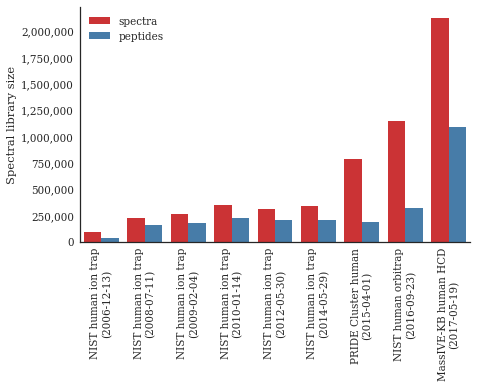

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

# NIST <=2013: http://www.peptideatlas.org/speclib/
# NIST >=2014: http://chemdata.nist.gov/dokuwiki/doku.php?id=peptidew:cdownload
# PRIDE Cluster: https://www.ebi.ac.uk/pride/cluster/#/libraries
# MassIVE-KB: https://massive.ucsd.edu/ProteoSAFe/static/massive-kb-libraries.jsp
spec_lib_size = [('NIST human ion trap\n(2006-12-13)', 93370, 33020),
                 ('NIST human ion trap\n(2008-07-11)', 223793, 154750),
                 ('NIST human ion trap\n(2009-02-04)', 261777, 178781),
                 ('NIST human ion trap\n(2010-01-14)', 345489, 222558),
                 ('NIST human ion trap\n(2012-05-30)', 310048, 208796),
                 ('NIST human ion trap\n(2014-05-29)', 340357, 207910),
                 ('PRIDE Cluster human\n(2015-04-01)', 789745, 189400),
                 ('NIST human orbitrap\n(2016-09-23)', 1148560, 324877),
                 ('MassIVE-KB human HCD\n(2017-05-19)', 2122892, 1088645)]
spec_lib_size_temp = []
for name, num_spectra, num_peptides in spec_lib_size:
    spec_lib_size_temp.append([name, 'spectra', num_spectra])
    spec_lib_size_temp.append([name, 'peptides', num_peptides])
df = pd.DataFrame(spec_lib_size_temp, columns=['library', 'type', 'num'])

width = 7
height = width / 1.618    # golden ratio
fig, ax = plt.subplots(figsize=(width, height))

sns.barplot(x='library', y='num', hue='type', data=df, ax=ax)

ax.xaxis.label.set_visible(False)
plt.setp(ax.get_xticklabels(), rotation='vertical')
ax.set_ylabel('Spectral library size')
ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper left')

sns.despine()

plt.savefig('spec_lib_size.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()